In [1]:
import pandas as pd
csv_path=('breast_cancer.csv')
cancer_data= pd.read_csv(csv_path)
cancer_data.drop(columns=['id'], inplace=True)
cancer_data.drop(columns=['Unnamed: 32'], inplace=True)
cancer_data['diagnosis'] = cancer_data['diagnosis'].replace({'M': 1, 'B': 0})
cancer_data.rename(columns={'concave points_worst': 'concave_points_worst',
                             'concave points_se': 'concave_points_se',
                             'concave points_mean': 'concave_points_mean'}, inplace=True)
class_distribution = cancer_data['diagnosis'].value_counts()
print(class_distribution)
print(cancer_data.head())

diagnosis
0    357
1    212
Name: count, dtype: int64
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_

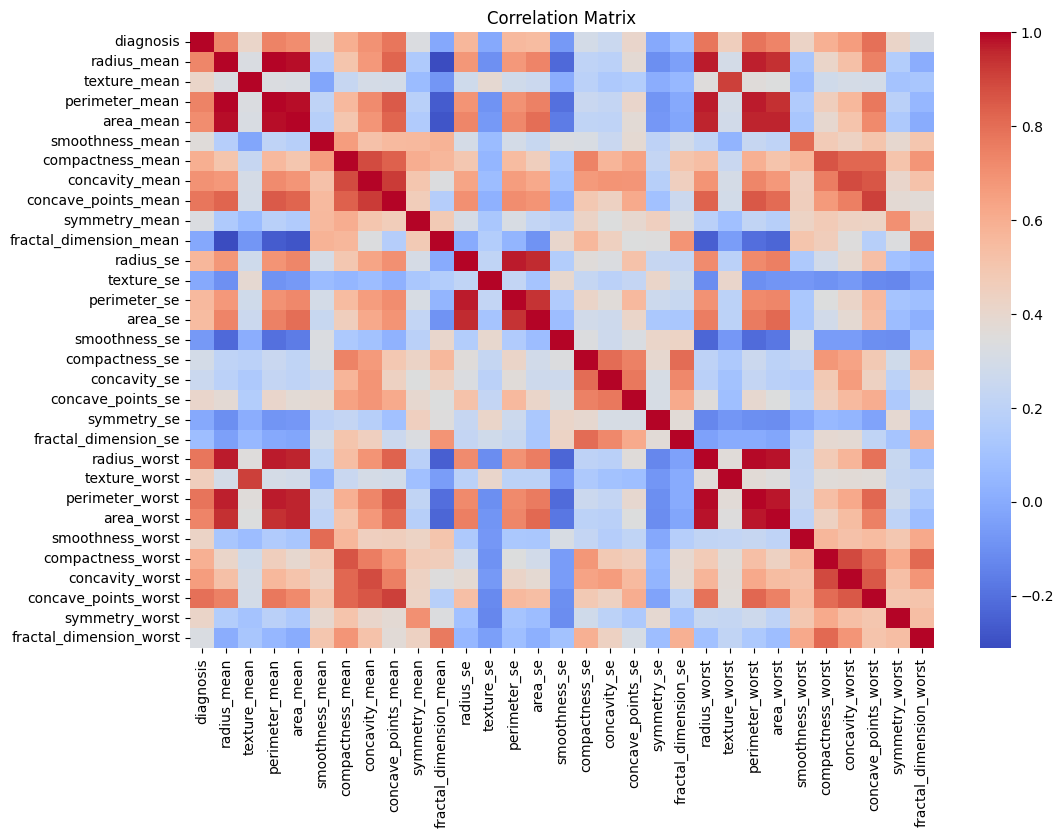

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = cancer_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

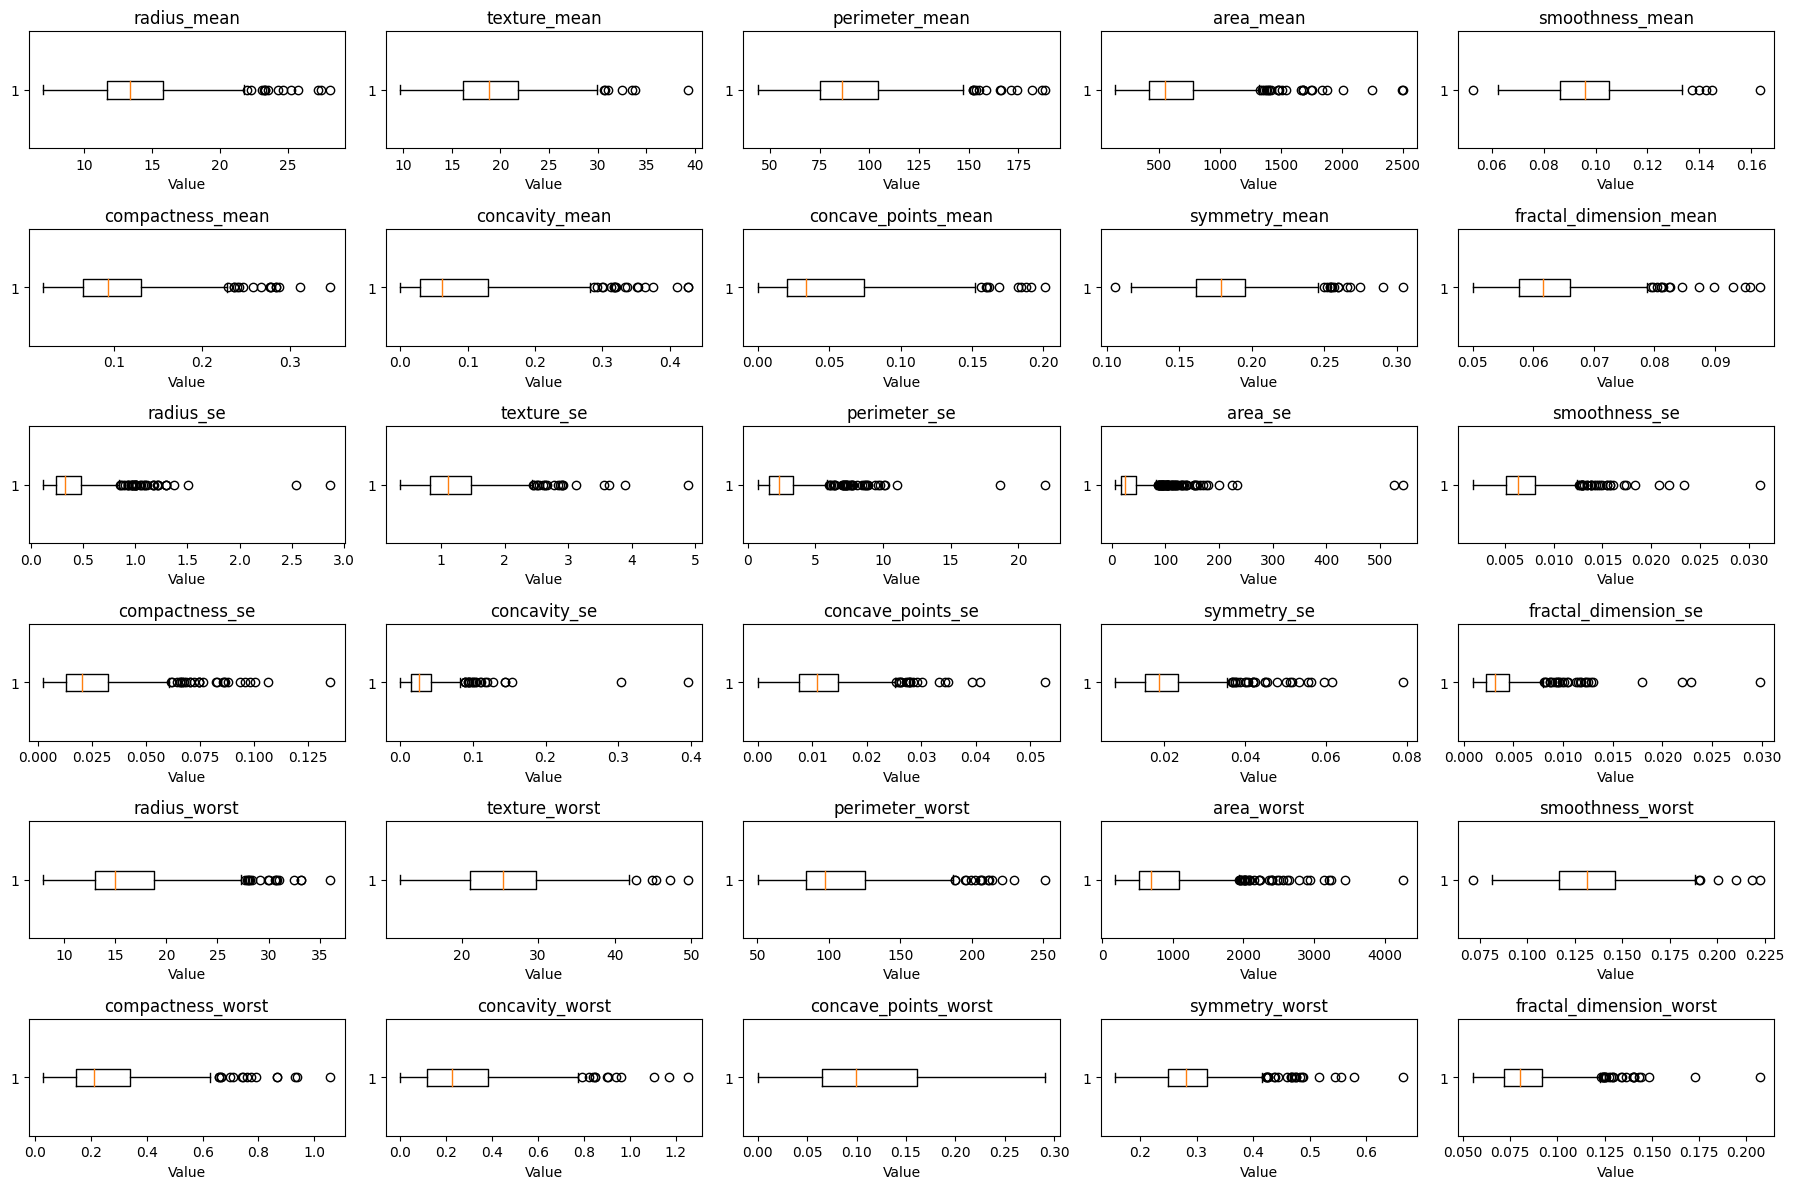

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
for i, feature in enumerate(cancer_data.columns):
    if feature != 'diagnosis':
        plt.subplot(6, 5, i)
        plt.boxplot(cancer_data[feature], vert=False)
        plt.title(feature)
        plt.xlabel("Value")
plt.tight_layout()
plt.show()

In [ ]:
print(cancer_data.shape)

(569, 31)


In [ ]:
print(cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import pandas as pd

X = cancer_data.drop("diagnosis", axis=1)
Y = cancer_data["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Eğitim seti boyutu:", X_train.shape[0])
print("Test seti boyutu:", X_test.shape[0])

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

train_set = X_train.copy()
train_set['diagnosis'] = Y_train

test_set = X_test.copy()
test_set['diagnosis'] = Y_test

overlap = pd.merge(train_set, test_set, how='inner', on=train_set.columns.tolist())

if not overlap.empty:
    print("Overlap:")
    print(overlap)
else:
    print("No overlap")


Eğitim seti boyutu: 455
Test seti boyutu: 114
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

No overlap
